In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
from matplotlib import pyplot as plt
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from models import SciNet
import pandas as pd
from utils import target_loss 
from loader import build_dataloader
import torch.optim.lr_scheduler as lr_scheduler
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

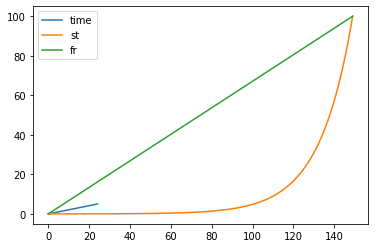

In [2]:
size = 25
size_ = 150
t_max = 5
t = np.linspace(0, t_max, size)
min_fr, max_fr = 0.01, 100
fr = np.linspace(min_fr, max_fr, size_)
start_st, end_st = 0.01, 100
st = np.logspace(np.log10(start_st), np.log10(end_st), size_, endpoint = True)

plt.plot(t, label="time")
plt.plot(st, label="st")
plt.plot(fr, label="fr")
plt.legend()

In [3]:
# the function that we generate the data with
def f(t, st, fr):
    return st**2 * fr * (1 - t/st - np.exp(-t/st))
'''def f(t, st, fr):
    return  st + fr + t'''
data = []
for st_ in st:
    for fr_ in fr:
        example = list(f(t, st_, fr_))
        t_pred = np.random.uniform(0, t_max)
        pred = f(t_pred,st_,fr_)
        example.append(fr_)
        example.append(st_)
        example.append(t_pred)
        example.append(pred)
        data.append(example)
data = np.array(data)
colummns = [str(i) for i in range(size)]
colummns.append("fr")
colummns.append("st")
colummns.append("t_pred")
colummns.append("pred") 
df = pd.DataFrame(data,columns=colummns)
df.to_csv("data.csv")
df.shape

(22500, 29)

In [4]:
# Load and prepare training data
dataloader = build_dataloader(size=size, batch_size =100)

========== Training with 1 latent neurons ==========
Epoch 1: SGD lr 0.001000 -> 0.000995
Epoch 1 -- loss 64618.808594, RMS error 13.683995, KL 4061.301758
Epoch 2: SGD lr 0.000995 -> 0.000990
Epoch 2 -- loss 41948.347656, RMS error 10.673757, KL 714.245361
Epoch 3: SGD lr 0.000990 -> 0.000985
Epoch 3 -- loss 13324.024414, RMS error 5.430518, KL 281.495789
Epoch 4: SGD lr 0.000985 -> 0.000980
Epoch 4 -- loss 3855.965088, RMS error 2.996758, KL 197.470901
Epoch 5: SGD lr 0.000980 -> 0.000975
Epoch 5 -- loss 1741.652222, RMS error 2.019670, KL 168.709396
Epoch 6: SGD lr 0.000975 -> 0.000970
Epoch 6 -- loss 1024.965088, RMS error 1.571420, KL 154.068893
Epoch 7: SGD lr 0.000970 -> 0.000965
Epoch 7 -- loss 694.760437, RMS error 1.349948, KL 139.869629
Epoch 8: SGD lr 0.000965 -> 0.000960
Epoch 8 -- loss 519.048157, RMS error 1.219118, KL 128.317612
Epoch 9: SGD lr 0.000960 -> 0.000955
Epoch 9 -- loss 431.348389, RMS error 1.128628, KL 119.438248
Epoch 10: SGD lr 0.000955 -> 0.000950
Epoch 

C:\Users\user\AppData\Local\Temp\ipykernel_22872\4138291572.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'size': size, 'epoch': N_EPOCHS, 'latent_neuron': n_neuron, 'loss': hist_loss[-1], 'rmse': hist_error[-1], 'kl divergence': hist_kl[-1]}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22872\4138291572.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Model saved to trained_models/scinet1--25-epoch200--latent-neuron-1.dat


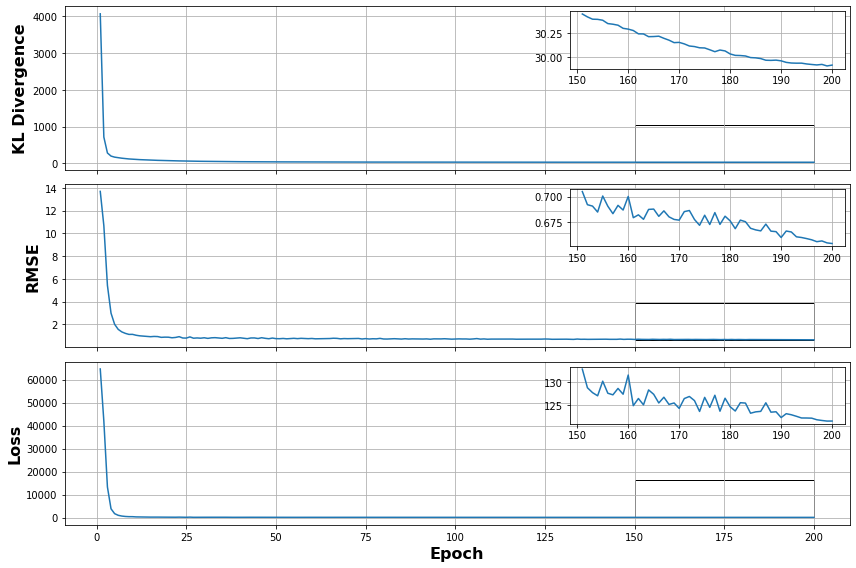

========== Training with 2 latent neurons ==========
Epoch 1: SGD lr 0.001000 -> 0.000995
Epoch 1 -- loss 80774.132812, RMS error 15.044907, KL 385574.625000
Epoch 2: SGD lr 0.000995 -> 0.000990
Epoch 2 -- loss 70082.757812, RMS error 14.897248, KL 1627.582886
Epoch 3: SGD lr 0.000990 -> 0.000985
Epoch 3 -- loss 54060.746094, RMS error 12.999196, KL 925.551514
Epoch 4: SGD lr 0.000985 -> 0.000980
Epoch 4 -- loss 30887.058594, RMS error 9.670886, KL 369.834351
Epoch 5: SGD lr 0.000980 -> 0.000975
Epoch 5 -- loss 10383.120117, RMS error 5.671235, KL 364.393890
Epoch 6: SGD lr 0.000975 -> 0.000970
Epoch 6 -- loss 5134.379883, RMS error 3.964652, KL 293.373535
Epoch 7: SGD lr 0.000970 -> 0.000965
Epoch 7 -- loss 3714.342529, RMS error 3.422820, KL 256.807739
Epoch 8: SGD lr 0.000965 -> 0.000960
Epoch 8 -- loss 2587.600098, RMS error 2.786290, KL 239.921219
Epoch 9: SGD lr 0.000960 -> 0.000955
Epoch 9 -- loss 1865.280029, RMS error 2.402685, KL 229.398392
Epoch 10: SGD lr 0.000955 -> 0.0009

C:\Users\user\AppData\Local\Temp\ipykernel_22872\4138291572.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'size': size, 'epoch': N_EPOCHS, 'latent_neuron': n_neuron, 'loss': hist_loss[-1], 'rmse': hist_error[-1], 'kl divergence': hist_kl[-1]}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22872\4138291572.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


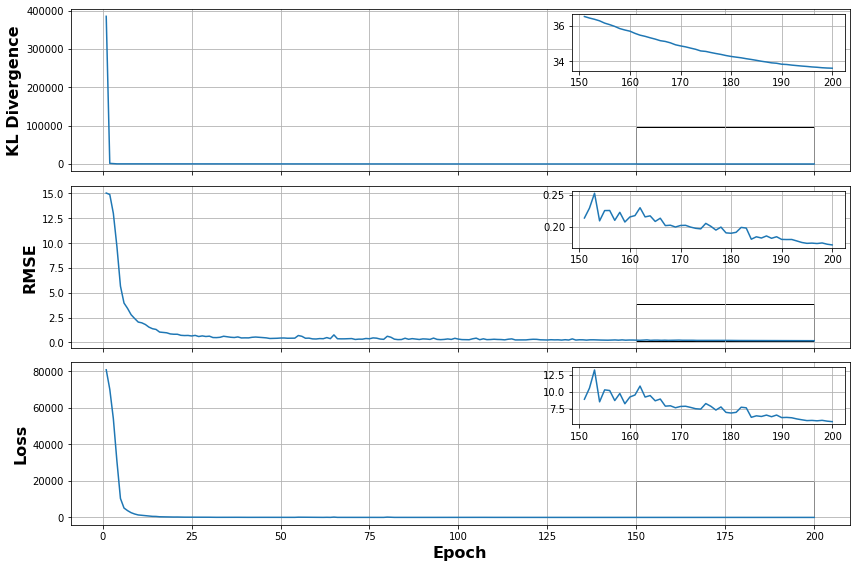

========== Training with 3 latent neurons ==========
Epoch 1: SGD lr 0.001000 -> 0.000995
Epoch 1 -- loss 68218.445312, RMS error 14.161718, KL 3563.368408
Epoch 2: SGD lr 0.000995 -> 0.000990
Epoch 2 -- loss 59951.980469, RMS error 13.507819, KL 1134.678833
Epoch 3: SGD lr 0.000990 -> 0.000985
Epoch 3 -- loss 53253.972656, RMS error 12.662023, KL 391.081940
Epoch 4: SGD lr 0.000985 -> 0.000980
Epoch 4 -- loss 29596.703125, RMS error 9.032198, KL 185.028275
Epoch 5: SGD lr 0.000980 -> 0.000975
Epoch 5 -- loss 8196.368164, RMS error 4.547668, KL 131.794891
Epoch 6: SGD lr 0.000975 -> 0.000970
Epoch 6 -- loss 2966.903320, RMS error 2.661225, KL 111.972969
Epoch 7: SGD lr 0.000970 -> 0.000965
Epoch 7 -- loss 1606.394165, RMS error 1.974331, KL 107.683388
Epoch 8: SGD lr 0.000965 -> 0.000960
Epoch 8 -- loss 947.620117, RMS error 1.501788, KL 101.788910
Epoch 9: SGD lr 0.000960 -> 0.000955
Epoch 9 -- loss 689.730408, RMS error 1.296631, KL 96.594833
Epoch 10: SGD lr 0.000955 -> 0.000950
Epo

C:\Users\user\AppData\Local\Temp\ipykernel_22872\4138291572.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'size': size, 'epoch': N_EPOCHS, 'latent_neuron': n_neuron, 'loss': hist_loss[-1], 'rmse': hist_error[-1], 'kl divergence': hist_kl[-1]}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22872\4138291572.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


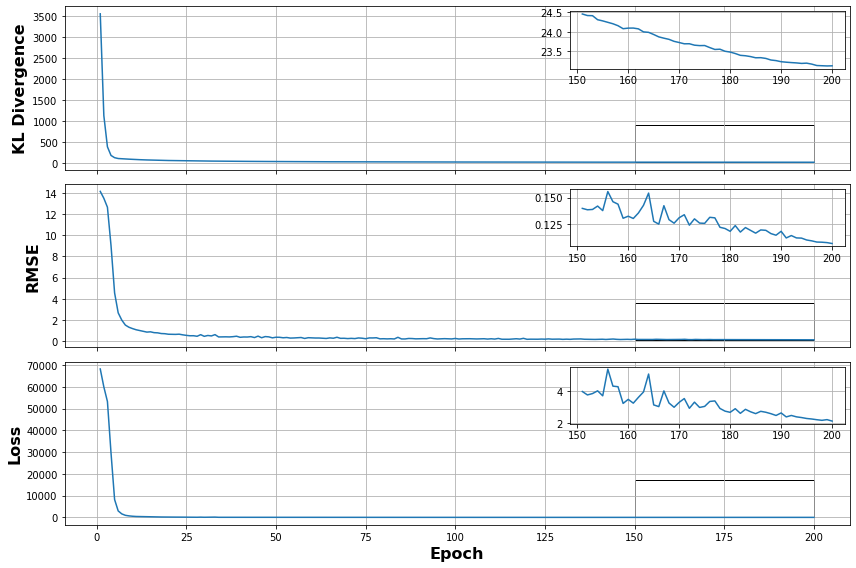

========== Training with 4 latent neurons ==========
Epoch 1: SGD lr 0.001000 -> 0.000995
Epoch 1 -- loss 70476.539062, RMS error 14.375885, KL 2831.007812
Epoch 2: SGD lr 0.000995 -> 0.000990
Epoch 2 -- loss 60490.328125, RMS error 13.585777, KL 1056.074463
Epoch 3: SGD lr 0.000990 -> 0.000985
Epoch 3 -- loss 53510.585938, RMS error 12.673539, KL 396.775543
Epoch 4: SGD lr 0.000985 -> 0.000980
Epoch 4 -- loss 28539.089844, RMS error 8.857479, KL 225.692688
Epoch 5: SGD lr 0.000980 -> 0.000975
Epoch 5 -- loss 9476.128906, RMS error 5.138306, KL 194.395966
Epoch 6: SGD lr 0.000975 -> 0.000970
Epoch 6 -- loss 3828.014404, RMS error 3.108885, KL 157.626801
Epoch 7: SGD lr 0.000970 -> 0.000965
Epoch 7 -- loss 2131.914551, RMS error 2.284484, KL 144.628098
Epoch 8: SGD lr 0.000965 -> 0.000960
Epoch 8 -- loss 1277.645264, RMS error 1.750270, KL 130.234299
Epoch 9: SGD lr 0.000960 -> 0.000955
Epoch 9 -- loss 841.426086, RMS error 1.401127, KL 121.364685
Epoch 10: SGD lr 0.000955 -> 0.000950
E

C:\Users\user\AppData\Local\Temp\ipykernel_22872\4138291572.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'size': size, 'epoch': N_EPOCHS, 'latent_neuron': n_neuron, 'loss': hist_loss[-1], 'rmse': hist_error[-1], 'kl divergence': hist_kl[-1]}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_22872\4138291572.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


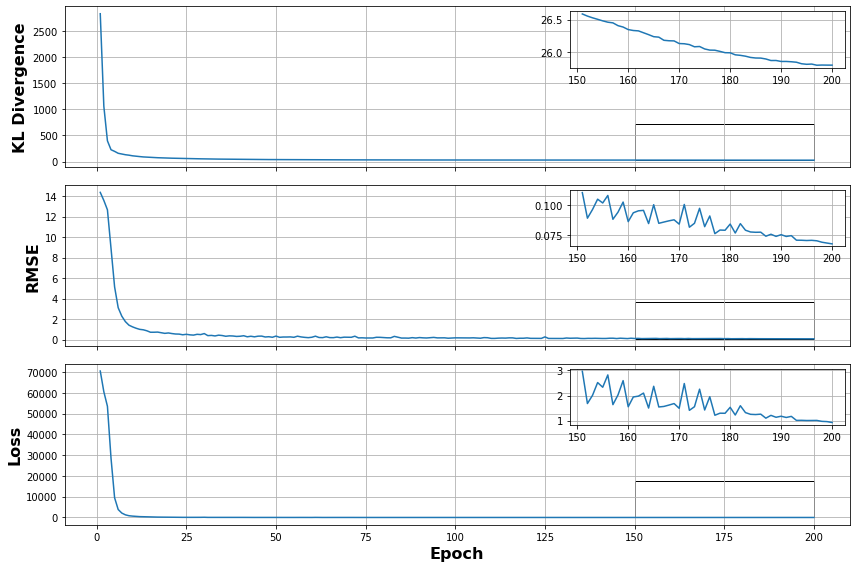

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# make a table to append all the results
results = pd.DataFrame(columns=['size', 'epoch', 'latent_neuron', 'loss', 'rmse', 'kl divergence'])

for n_neuron in range(1, 5):
    print('='*10, f"Training with {n_neuron} latent neurons", '='*10)
    # Setup scinet model with {n_neuron} latent neurons
    scinet = SciNet( size, 1, n_neuron, 100)

    # Training setup
    N_EPOCHS = 200
    SAVE_PATH = f"trained_models/scinet1--{size}-epoch{N_EPOCHS}--latent-neuron-{n_neuron}.dat"
    optimizer = optim.Adam(scinet.parameters(), lr=0.001)
    hist_error = []
    hist_kl = []
    hist_loss = []
    scheduler = lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.009, total_iters=N_EPOCHS)
    beta = 0.5

    # Training loop
    for epoch in range(N_EPOCHS):  
        epoch_error = []
        epoch_kl = []
        epoch_loss = []
        for i_batch, minibatch in enumerate(dataloader):
            time_series, _, _, question, answer = minibatch['time_series'] / 5, minibatch['fr'] / 5, minibatch['st'] / 5, minibatch['question'] / 5, minibatch['answer'] / 5
            # concat the time series with the features
            inputs = torch.cat((time_series, question.reshape(-1, 1)), 1)
            # build the output
            outputs = answer

            optimizer.zero_grad()
            # print(inputs[0])
            pred = scinet.forward(inputs)
            # print(pred)
            # break
            loss_ = target_loss(pred, outputs)
            kl = beta * scinet.kl_loss
            loss = loss_ + kl
            loss.backward()
            optimizer.step()
            error = torch.mean(torch.sqrt((pred[:,0]-outputs)**2)).detach().numpy()
            epoch_error.append(error)
            epoch_kl.append(kl.data.detach().numpy())
            epoch_loss.append(loss_.data.detach().numpy())
        # break
        hist_error.append(np.mean(epoch_error))
        hist_loss.append(np.mean(epoch_loss))
        hist_kl.append(np.mean(epoch_kl))

        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]
        print("Epoch %d: SGD lr %.6f -> %.6f" % (epoch+1, before_lr, after_lr))
        
        print("Epoch %d -- loss %f, RMS error %f, KL %f" % (epoch+1, hist_loss[-1], hist_error[-1], hist_kl[-1]))
    # append the informations to the table
    results = results.append({'size': size, 'epoch': N_EPOCHS, 'latent_neuron': n_neuron, 'loss': hist_loss[-1], 'rmse': hist_error[-1], 'kl divergence': hist_kl[-1]}, ignore_index=True)
    torch.save(scinet.state_dict(), SAVE_PATH)
    print("Model saved to %s" % SAVE_PATH)

    # Create a figure with three subplots
    fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

    # Define the starting epoch for zooming in
    start_epoch = 150  # Change this to your desired starting epoch
    end_epoch = N_EPOCHS  # Change this to your desired ending epoch

    epochs = np.arange(1, N_EPOCHS + 1)

    # Plot the first subplot
    axs[0].plot(epochs, hist_kl)
    axs[0].set_ylabel("KL Divergence", fontsize=16, fontweight='bold')
    axs[0].grid(True)

    # Create an inset_axes for zooming in on the first subplotss
    axins1 = inset_axes(axs[0], width="35%", height="35%", loc='upper right')
    axins1.plot(epochs[start_epoch:end_epoch], hist_kl[start_epoch:end_epoch])
    axins1.grid(True)

    # Add a thinner, black rectangle with smaller height to the initial plot indicating the zoomed-in area
    rect1 = Rectangle((start_epoch, min(hist_kl)), end_epoch - start_epoch, (max(hist_kl) - min(hist_kl)) / 4, fill=False, edgecolor='black', linewidth=1)
    axs[0].add_patch(rect1)

    # Plot the second subplot
    axs[1].plot(epochs, hist_error)
    axs[1].set_ylabel("RMSE", fontsize=16, fontweight='bold')
    axs[1].grid(True)

    # Create an inset_axes for zooming in on the second subplot
    axins2 = inset_axes(axs[1], width="35%", height="35%", loc='upper right')
    axins2.plot(epochs[start_epoch:end_epoch], hist_error[start_epoch:end_epoch])
    axins2.grid(True)

    # Add a thinner, black rectangle with smaller height to the initial plot indicating the zoomed-in area
    rect2 = Rectangle((start_epoch, min(hist_error)), end_epoch - start_epoch, (max(hist_error) - min(hist_error)) / 4, fill=False, edgecolor='black', linewidth=1)
    axs[1].add_patch(rect2)

    # Plot the third subplot
    axs[2].plot(epochs, hist_loss)
    axs[2].set_xlabel("Epoch", fontsize=16, fontweight='bold')
    axs[2].set_ylabel("Loss", fontsize=16, fontweight='bold')
    axs[2].grid(True)

    # Create an inset_axes for zooming in on the third subplot
    axins3 = inset_axes(axs[2], width="35%", height="35%", loc='upper right')
    axins3.plot(epochs[start_epoch:end_epoch], hist_loss[start_epoch:end_epoch])
    axins3.grid(True)

    # Add a thinner, black rectangle with smaller height to the initial plot indicating the zoomed-in area
    rect3 = Rectangle((start_epoch, min(hist_loss)), end_epoch - start_epoch, (max(hist_loss) - min(hist_loss)) / 4, fill=False, edgecolor='black', linewidth=1)
    axs[2].add_patch(rect3)

    # Adjust layout
    plt.tight_layout()

    # Save the plot as 'loss_zoomed_with_rectangles.pdf'
    plt.savefig(f'plot/{n_neuron}-latent-neuron/loss_zoomed_with_rectangles_{size}size_{N_EPOCHS}epoch.pdf')

    # Show the plot (optional)
    plt.show()

In [7]:
results.to_csv("results.csv")

In [8]:
results

,size,epoch,latent_neuron,loss,rmse,kl divergence
0,25.0,200.0,1.0,121.54538,0.653809,29.919987
1,25.0,200.0,2.0,5.618821,0.172094,33.611748
2,25.0,200.0,3.0,2.13982,0.106993,23.116497
3,25.0,200.0,4.0,0.923682,0.067629,25.794506


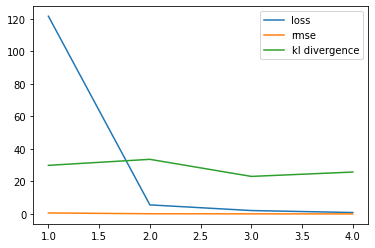

In [9]:
# plot the results of the training of the models
plt.plot(results['latent_neuron'], results['loss'], label="loss")
plt.plot(results['latent_neuron'], results['rmse'], label="rmse")
plt.plot(results['latent_neuron'], results['kl divergence'], label="kl divergence")
plt.legend()
